In [1]:
import pandas as pd
import os

# 폴더에 있는 CSV 파일들을 한 번에 불러오기
folder_path = 'C:/dangoal25/data/'
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# 파일들을 데이터프레임으로 읽어들여 하나의 리스트에 저장
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in file_list]

# 데이터프레임들을 하나로 합치기 (필요할 경우)
df = pd.concat(dfs, ignore_index=True)

# 데이터 확인
print(df.head())


   Unnamed: 0        date      service order_id  \
0           0  2024-04-11  mart_pickup      NaN   
1           1  2024-04-11  gs25_pickup      NaN   
2           2  2024-04-11  gs25_pickup      NaN   
3           3  2024-04-11  gs25_pickup      NaN   
4           4  2024-04-11  gs25_pickup      NaN   

                                             user_id        item_id  \
0  5d7f9529edd836dc20204186b5ce37904eb24b52d205ff...  8801051208870   
1  773850ff567b04478e461d1cfbdb0b3c88288d12a49500...  4901777275652   
2  773850ff567b04478e461d1cfbdb0b3c88288d12a49500...  4901777275652   
3  773850ff567b04478e461d1cfbdb0b3c88288d12a49500...  4901777275652   
4  773850ff567b04478e461d1cfbdb0b3c88288d12a49500...  4901777275652   

         item_name inter               event_time  
0  테크 알레르기제거 드럼 3L  view  2024-04-10 19:07:12.388  
1      빔산토리)히비키하모니  view  2024-04-10 11:49:33.723  
2      빔산토리)히비키하모니  view  2024-04-10 09:10:40.293  
3      빔산토리)히비키하모니  view  2024-04-10 11:22:55.376  
4     

In [4]:
# 'event_time' 열을 datetime 형식으로 변환 (오류 발생 시 NaT로 처리)
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

# 변환에 실패한 값 확인
invalid_times = df[df['event_time'].isna()]
print(f"변환 실패한 값 개수: {len(invalid_times)}")
print(invalid_times.head())


변환 실패한 값 개수: 89
          Unnamed: 0  date  service  \
12445870      508676  date  service   
12944618     1007424  date  service   
13447772     1510578  date  service   
13935497     1998303  date  service   
14355404     2418210  date  service   

                                                   order_id  \
12445870  ca13a6b2c9651b3841fc9ffe25a7a4fccea30a22caf1e8...   
12944618  ca13a6b2c9651b3841fc9ffe25a7a4fccea30a22caf1e8...   
13447772  ca13a6b2c9651b3841fc9ffe25a7a4fccea30a22caf1e8...   
13935497  ca13a6b2c9651b3841fc9ffe25a7a4fccea30a22caf1e8...   
14355404  ca13a6b2c9651b3841fc9ffe25a7a4fccea30a22caf1e8...   

                                                    user_id  item_id  \
12445870  f89d6b6960453241bc5b09b4d0d8ad86d53769e0514733...  item_id   
12944618  f89d6b6960453241bc5b09b4d0d8ad86d53769e0514733...  item_id   
13447772  f89d6b6960453241bc5b09b4d0d8ad86d53769e0514733...  item_id   
13935497  f89d6b6960453241bc5b09b4d0d8ad86d53769e0514733...  item_id   
14355404  

In [5]:
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [6]:
# NaT (변환 실패) 값을 제외한 데이터로 필터링
df = df.dropna(subset=['event_time'])

# 이후 분석을 위한 데이터 처리
df['hour'] = df['event_time'].dt.hour


In [7]:
# NaT 값 제거
df_cleaned = df.dropna(subset=['event_time'])

# NaT가 제거된 데이터 확인
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 79978950 entries, 0 to 79979038
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Unnamed: 0  int64         
 1   date        object        
 2   service     object        
 3   order_id    object        
 4   user_id     object        
 5   item_id     object        
 6   item_name   object        
 7   inter       object        
 8   event_time  datetime64[ns]
 9   hour        int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 6.3+ GB
None


In [8]:
# 시간대별로 데이터 그룹화
df_cleaned['hour'] = df_cleaned['event_time'].dt.hour

# 시간대별로 많이 팔린 상품
sales_by_hour = df_cleaned.groupby('hour')['item_id'].count()

# 시간대별로 사용자 활동 분석 (특정 시간대에 많이 사용되는 서비스)
service_usage_by_hour = df_cleaned.groupby('hour')['user_id'].count()

print(sales_by_hour)
print(service_usage_by_hour)


hour
0     2257728
1     1379250
2      890651
3      640345
4      525771
5      650835
6     1075613
7     1564672
8     2176675
9     2855694
10    4043819
11    5215013
12    4820611
13    4605253
14    4677156
15    4921678
16    5428786
17    5945875
18    5812781
19    5222212
20    4913540
21    4538095
22    3704432
23    2112465
Name: item_id, dtype: int64
hour
0     2257728
1     1379250
2      890651
3      640345
4      525771
5      650835
6     1075613
7     1564672
8     2176675
9     2855694
10    4043819
11    5215013
12    4820611
13    4605253
14    4677156
15    4921678
16    5428786
17    5945875
18    5812781
19    5222212
20    4913540
21    4538095
22    3704432
23    2112465
Name: user_id, dtype: int64


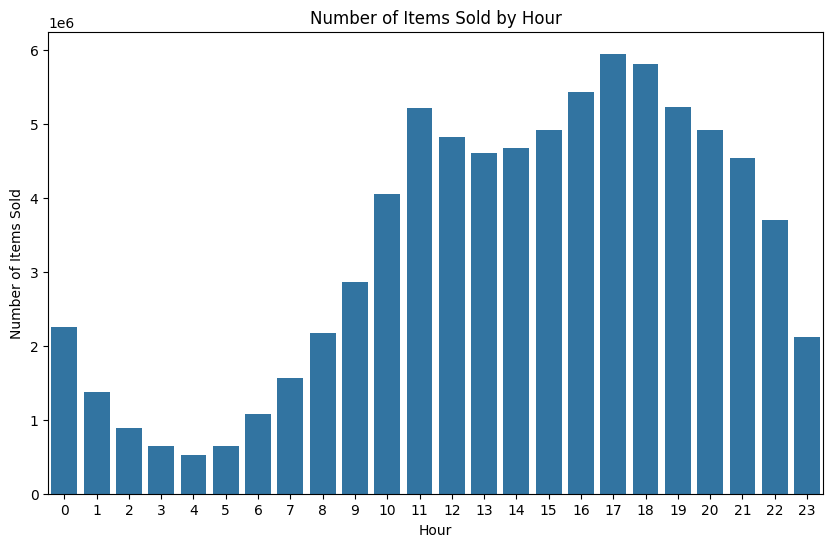

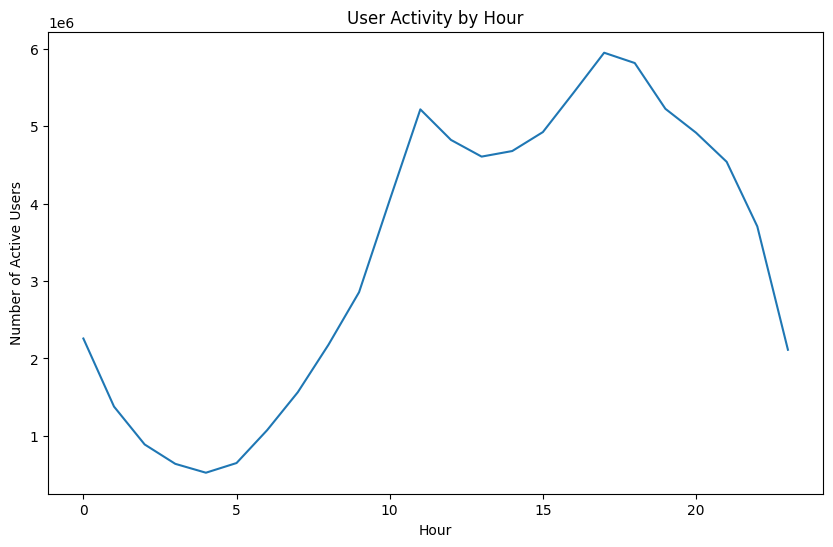

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시간대별 판매량 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values)
plt.title('Number of Items Sold by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Items Sold')
plt.show()

# 시간대별 사용자 활동 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x=service_usage_by_hour.index, y=service_usage_by_hour.values)
plt.title('User Activity by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Active Users')
plt.show()


In [11]:
# 'event_time'에서 월 정보 추출
df_cleaned['month'] = df_cleaned['event_time'].dt.month

# 'order' 이벤트만 필터링
df_orders = df_cleaned[df_cleaned['inter'] == 'order']

# 월별로 가장 많이 주문된 상품 상위 10개
top_10_orders_by_month = df_orders.groupby(['month', 'item_name']).size().reset_index(name='count')
top_10_orders_by_month = top_10_orders_by_month.groupby('month').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

print(top_10_orders_by_month)


    month                         item_name  count
0       1            농심)카프리썬 오렌지망고 200ml*10      1
1       2  치킨25)뉴쏜살치킨(다리살)매운맛,치킨25)주문조리상품증정      8
2       2     치킨25)뉴쏜살치킨(다리살),치킨25)주문조리상품증정      7
3       2                 덴마크)소화가잘되는우유900ML      4
4       2             [번들]오비)스텔라캔500ML(신)*4      3
..    ...                               ...    ...
76      9                   요아정)허니요거트초코볼파르페   3705
77      9                      하이네켄캔500ML*4   2451
78      9                   롯데아사히)아사히캔500ML   2449
79      9                     치킨25)쏜살치킨(순살)   2237
80      9                  치킨25)쏜살치킨(순살)매운맛   2178

[81 rows x 3 columns]


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16144\3547119103.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_orders_by_month = top_10_orders_by_month.groupby('month').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


In [12]:
# 'order' 이벤트만 필터링
df_orders = df_cleaned[df_cleaned['inter'] == 'order']

# 월별로 가장 많이 주문된 상품 상위 10개
top_10_orders_by_month = df_orders.groupby(['month', 'item_name']).size().reset_index(name='count')

# Deprecated 경고 수정: apply를 사용하지 않고 직접 nlargest를 사용하여 각 그룹에서 상위 10개 추출
top_10_orders_by_month = top_10_orders_by_month.groupby('month', group_keys=False).apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

print(top_10_orders_by_month)


    month                         item_name  count
0       1            농심)카프리썬 오렌지망고 200ml*10      1
1       2  치킨25)뉴쏜살치킨(다리살)매운맛,치킨25)주문조리상품증정      8
2       2     치킨25)뉴쏜살치킨(다리살),치킨25)주문조리상품증정      7
3       2                 덴마크)소화가잘되는우유900ML      4
4       2             [번들]오비)스텔라캔500ML(신)*4      3
..    ...                               ...    ...
76      9                   요아정)허니요거트초코볼파르페   3705
77      9                      하이네켄캔500ML*4   2451
78      9                   롯데아사히)아사히캔500ML   2449
79      9                     치킨25)쏜살치킨(순살)   2237
80      9                  치킨25)쏜살치킨(순살)매운맛   2178

[81 rows x 3 columns]


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16144\1286923137.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_orders_by_month = top_10_orders_by_month.groupby('month', group_keys=False).apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


In [13]:
# 데이터 범위 확인
df_cleaned['month'] = df_cleaned['event_time'].dt.month

# 데이터에 포함된 월 확인
print(df_cleaned['month'].unique())


[4 3 2 1 8 7 6 5 9]


In [14]:
# 4월부터 9월까지의 데이터만 필터링
df_filtered = df_cleaned[df_cleaned['month'].between(4, 9)]


In [15]:
# 'order' 이벤트만 정확히 필터링
df_orders = df_filtered[df_filtered['inter'] == 'order']


In [16]:
# 월별로 가장 많이 주문된 상품 상위 10개 다시 계산
top_10_orders_by_month = df_orders.groupby(['month', 'item_name']).size().reset_index(name='count')

# 각 월별로 상위 10개 상품 추출
top_10_orders_by_month = top_10_orders_by_month.groupby('month', group_keys=False).apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

print(top_10_orders_by_month)


    month                               item_name  count
0       4                    [번들]오비)버드와이저캔500ML*4  11780
1       4                      [번들]오비)산토리캔500ML*4  11181
2       4                   [번들]오비)스텔라캔500ML(신)*4  10829
3       4                            Y)틈새비김면(특대컵)   7038
4       4                             칭따오500ml캔*4   5731
5       4                    [번들]비어케이)칭따오캔500ML*6   5122
6       4                       [번들]하이네켄캔500ML*4입   5074
7       4           치킨25)뉴쏜살치킨(다리살),치킨25)주문조리상품증정   4108
8       4                        아사히수퍼드라이캔500ML*6   3142
9       4        치킨25)뉴쏜살치킨(다리살)매운맛,치킨25)주문조리상품증정   3074
10      5                       [번들]하이네켄캔500ML*4입  21042
11      5                    [번들]오비)버드와이저캔500ML*4  15728
12      5                     디아지오)기네스흑맥주캔440ML*4   4420
13      5                       [번들]아사히생맥주340ML*6   3957
14      5                           특)발베니12년700ML   3802
15      5  [번들]하이네켄캔500ML*4입,[번들]오비)버드와이저캔500ML*4   2941
16      5      치킨25)뉴쏜살치킨(다리살),

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16144\4246079857.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_orders_by_month = top_10_orders_by_month.groupby('month', group_keys=False).apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16144\2190626200.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='item_name', data=top_10_orders_total, palette='Blues_d')
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16144\2190626200.py:17: UserWarning: Glyph 48264 (\N{HANG

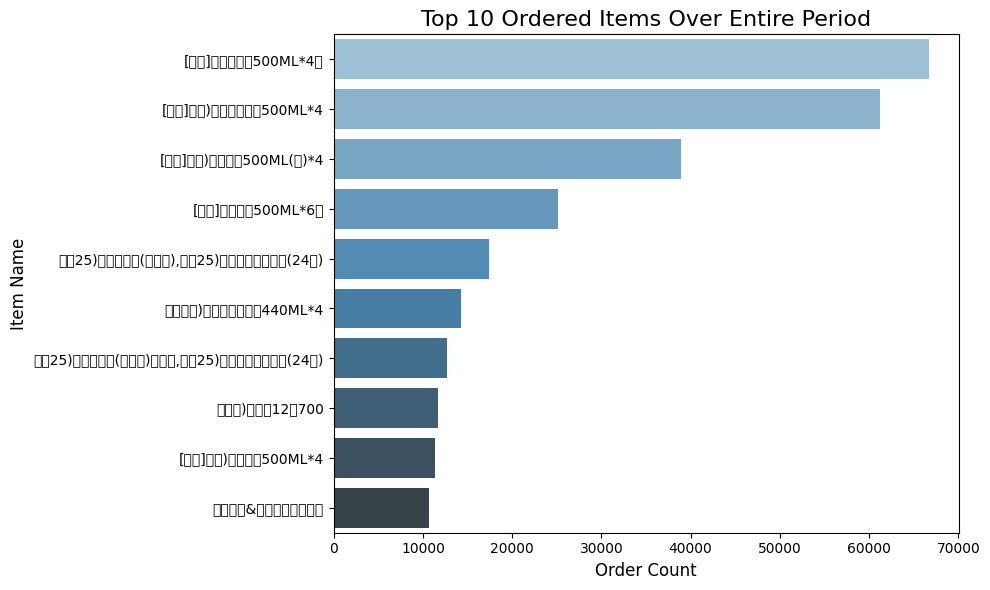

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 총 기간 동안 가장 많이 주문된 상품 상위 10개
top_10_orders_total = df_orders.groupby('item_name').size().nlargest(10).reset_index(name='count')

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='item_name', data=top_10_orders_total, palette='Blues_d')

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Ordered Items Over Entire Period', fontsize=16)
plt.xlabel('Order Count', fontsize=12)
plt.ylabel('Item Name', fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16144\4282733464.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='item_name', data=top_10_orders_total, palette='Blues_d')
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16144\4282733464.py:21: UserWarning: Glyph 48264 (\N{HAN

총 기간 동안 가장 많이 주문된 상위 10개 상품 리스트:
                               item_name  count
0                      [번들]하이네켄캔500ML*4입  66736
1                   [번들]오비)버드와이저캔500ML*4  61282
2                  [번들]오비)스텔라캔500ML(신)*4  38883
3                       [번들]아사히캔500ML*6입  25153
4     치킨25)뉴쏜살치킨(다리살),치킨25)주문조리상품증정(24년)  17362
5                    디아지오)기네스흑맥주캔440ML*4  14246
6  치킨25)뉴쏜살치킨(다리살)매운맛,치킨25)주문조리상품증정(24년)  12710
7                          윌리엄)발베니12년700  11658
8                     [번들]오비)산토리캔500ML*4  11376
9                          카다이프&피스타치오초콜릿  10666


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


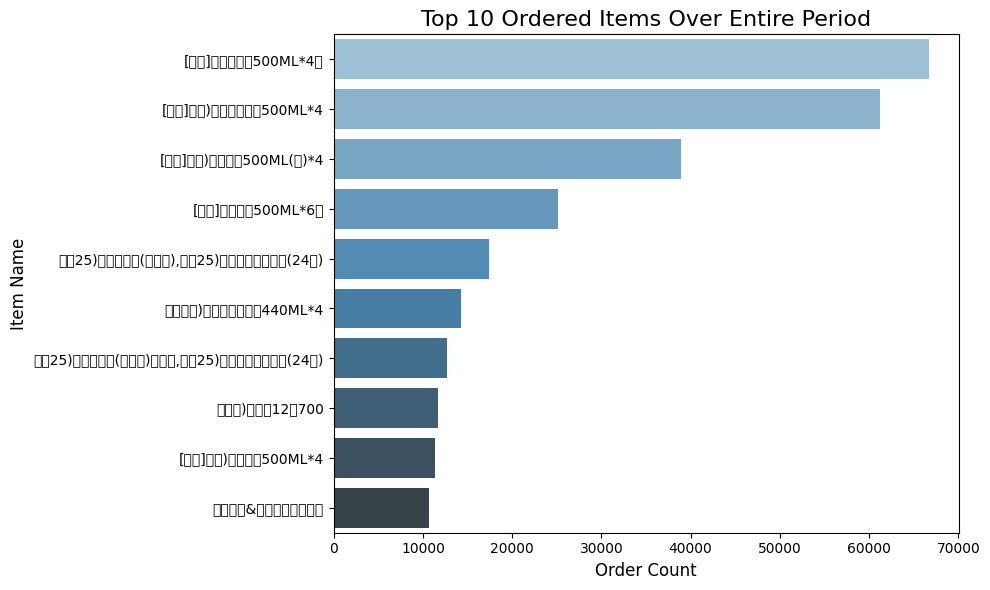

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 총 기간 동안 가장 많이 주문된 상품 상위 10개 리스트 추출
top_10_orders_total = df_orders.groupby('item_name').size().nlargest(10).reset_index(name='count')

# 상위 10개의 리스트 출력
print("총 기간 동안 가장 많이 주문된 상위 10개 상품 리스트:")
print(top_10_orders_total)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='item_name', data=top_10_orders_total, palette='Blues_d')

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Ordered Items Over Entire Period', fontsize=16)
plt.xlabel('Order Count', fontsize=12)
plt.ylabel('Item Name', fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()


In [23]:
# 월별, 시간대별로 상위 5개의 상품 추출
top_5_items_by_hour_month = df_orders.groupby(['month', 'hour', 'item_name']).size().reset_index(name='count')

# 각 월, 시간대별로 상위 5개 상품 추출
top_5_items_by_hour_month = top_5_items_by_hour_month.groupby(['month', 'hour'], group_keys=False).apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# 결과 출력
print(top_5_items_by_hour_month)


     month  hour                 item_name  count
0        4     0        [번들]오비)산토리캔500ML*4    284
1        4     0     [번들]오비)스텔라캔500ML(신)*4    252
2        4     0      [번들]오비)버드와이저캔500ML*4    244
3        4     0              Y)틈새비김면(특대컵)    234
4        4     0        CAFE25 아이스아메리카노(L)    173
..     ...   ...                       ...    ...
715      9    23       한맥464ML*12캔+맥주거품기세트     24
716      9    23                 제임슨 700ml     17
717      9    23        브루클린필스너500ml X 24캔     12
718      9    23     간바레 오또상 900ml 홈술 기획세트     11
719      9    23  우메니시키 카타리츠쿠세 준마이긴죠 (초특가)     11

[720 rows x 4 columns]


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16144\525768373.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_items_by_hour_month = top_5_items_by_hour_month.groupby(['month', 'hour'], group_keys=False).apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


In [32]:
# Convert 'event_time' to a datetime object for easier manipulation
df['event_time'] = pd.to_datetime(df['event_time'])

# Extract the hour or another time period (depending on how you want to group by time)
df['hour'] = df['event_time'].dt.hour

# Group by hour and item_name to calculate the number of orders per item
top_items = df.groupby(['hour', 'item_name']).size().reset_index(name='order_count')

# Sort and get the top 5 items per hour
top_5_items = top_items.groupby('hour').apply(lambda x: x.nlargest(1, 'order_count')).reset_index(drop=True)

# Display the top 5 items per hour
top_5_items


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16144\2526022407.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_items = top_items.groupby('hour').apply(lambda x: x.nlargest(1, 'order_count')).reset_index(drop=True)


,hour,item_name,order_count
0,0,빔산토리)히비키하모니,21777
1,1,빔산토리)히비키하모니,20990
2,2,빔산토리)히비키하모니,13730
3,3,빔산토리)히비키하모니,8366
4,4,빔산토리)히비키하모니,5679
5,5,CAFE25 아이스아메리카노(L),5497
6,6,CAFE25 아이스아메리카노(L),10138
7,7,CAFE25 아이스아메리카노(L),17196
8,8,Y)오모리김치찌개라면(대컵),15439
9,9,Y)오모리김치찌개라면(대컵),19913


In [31]:
# Save the DataFrame to a CSV file
top_5_items.toㄴㄴ_csv('hourly_top_1.csv', index=False)

# This will save the file in your working directory

